## Developed by: Krishna Kumar (krishnak@utexas.edu)

# Shape functions (basis functions)

This notebook explores the computation of finite element shape functions. We start with the one-dimensional case.

We will use NumPy to compute the shape functions, and Matplotlib to visualise the shape functions, so we need to import both:

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Lagrange polynomials in 1D

We start with the exmaple of a cubic finite element basis, and then develop a function for plotting shape functions of any order. In all cases we consider the interval $(-1, 1)$.

### Quadratic basis

Quadratic shape functions will have the form:

$$
N_{i}(x) = c_{0} + c_{1} x + c_{2} x^{2}
$$

Recall the shape function $N_{i}$ should be equal to one at its own node ($N_{i}(x_{i}) = 1$) and zero at all other nodes ($N_{i}(x_{i}) = 0$ when  $i \ne j$).

The quadratic function has three coefficients, so we need three nodes. First step is to create the nodes on the interval $(-1, 1)$. We will consider equally spaced nodes, in which case we can use the `linspace` function:

In [2]:
x_n = np.linspace(-1.0, 1.0, 3)
print(x_n)

[-1.  0.  1.]


Next, we construct the Vandermonde matrix for a third-order polynomial and the points `x_n`: 

In [3]:
A = np.vander(x_n, 3)

We can now compute the three shape functions by solving $\boldsymbol{A} \boldsymbol{c}_{i} = \boldsymbol{f}_{i}$ to get the polynomial coefficients $\boldsymbol{c}_{i}$ for the shape function $N_{i}$. Three node $i$, $f_{j=1} = 1$ if $i=j$ and $f_{j} = 0$ if $i \ne j$. We use a loop to compute the three shape functions at once:

In [ ]:
shape_functions = []
for i in range(3):
    f = np.zeros(3)
    f[i] = 1.0
    c = np.linalg.solve(A, f)
    
    shape_functions.append(np.poly1d(c))
    print("-Shape function for node {}: \n{}".format(i, shape_functions[-1]))

-Shape function for node 0: 
     2
0.5 x - 0.5 x
-Shape function for node 1: 
    2
-1 x + 1
-Shape function for node 2: 
     2
0.5 x + 0.5 x


We can now plot each shape function (we compute each shape function at 200 points to plot the function).

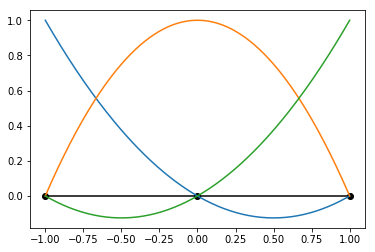

In [ ]:
# Evaluate the polynomial at the points
x = np.linspace(-1.0, 1.0, 200) 
plt.plot(x_n, np.zeros(3), '-o', color='k');
for shape_function in shape_functions:
    N = shape_function(x)
    plt.plot(x, N);

We can use NumPy to compute the derivatives of the shape function, and then plot these.

In [ ]:
x = np.linspace(-1.0, 1.0, 200) 
plt.plot(x_n, np.zeros(len(x_n)), '-o', color='k');
for shape_function in shape_functions:
    dshape_function = np.polyder(shape_function)
    dN = dshape_function(x)
    plt.plot(x, dN);

### Arbitary degree Lagrange polynomials

We now write a function that performs the above tasks so we can compute and plot shape functions on any degree. The argument to the function, `n`, is the polynomial degree of the shape functions that we wish to compute. 

In [ ]:
def plot_lagrange(n):
    n = n + 1 # number of nodes
    x_n = np.linspace(-1.0, 1.0, n)
    A = np.vander(x_n, len(x_n))
    
    f = np.zeros(n)

    shape_functions = []
    x = np.linspace(-1.0, 1.0, 200) 
    plt.plot(x_n, np.zeros(len(x_n)), '-o', color='k');
    for i in range(n):
        f = np.zeros(n)
        f[i] = 1.0
        c = np.linalg.solve(A, f)
    
        plt.plot((x_n, x_n), (0.0, 1.0), '--', color='k');

        p = np.poly1d(c)
        N = p(x)
        plt.plot(x, N);

For a $3$rd order polynomial:

In [ ]:
plot_lagrange(3) 